In [1]:
import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(work_path)

from my_helper.regression import *
from my_helper.util import *
from my_helper.plot import *
from my_helper.analysis import *
from my_helper.classification import *
from yjk_module.preprocessing import *
from yjk_module.ml_module import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve
from statsmodels.formula.api import logit
from statsmodels.api import Logit, add_constant

In [2]:
df = pd.read_excel("./data/pima_indians_diabetes.xlsx")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

df2 = df.copy()
df2[zero_features] = df2[zero_features].replace(0, np.nan)

df2 = my_replace_missing_value(df)

In [4]:
pp = YjkPreprocessor()
pp.set_strategy(outline = None)

아래와 같이 처리합니다.
+-------------+---------------+
| 범주        | 처리방법      |
|-------------+---------------|
| 이상치 처리 | 처리하지 않음 |
| 결측치 처리 | 중앙값 대체   |
| 스케일러    | 표준화        |
| 인코딩      | 원핫인코딩    |
+-------------+---------------+


In [5]:
X = df2.copy()
Y = X.pop('Outcome')

In [6]:
X_p = pp.fit_transform(X)

데이터프레임 크기 : (768, 8)
데이터프레임에 결측치는 없습니다.
연속형 데이터 컬럼 : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], 총 8개


In [7]:
x_train, x_test, y_train, y_test = train_test_split(X_p, Y, test_size = 0.2, random_state = 0, stratify = Y)

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
|  7 |   0.1 | l2        |          0.770412 |
| 10 |     1 | l2        |          0.768772 |
| 13 |    10 | l2        |          0.768772 |
| 16 |   100 | l2        |          0.768772 |
|  4 |  0.01 | l2        |          0.742716 |
|  1 | 0.001 | l2        |          0.651473 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.245491 |     0.338728 | 로지스틱회귀의 성능 측정 지표로, 1에 가까울수록 좋은 모델 |
| 정확도(Accuracy)        |     0.773616 |     0.772727 | 예측 결과(TN,FP,TP,TN)가 실제 결과

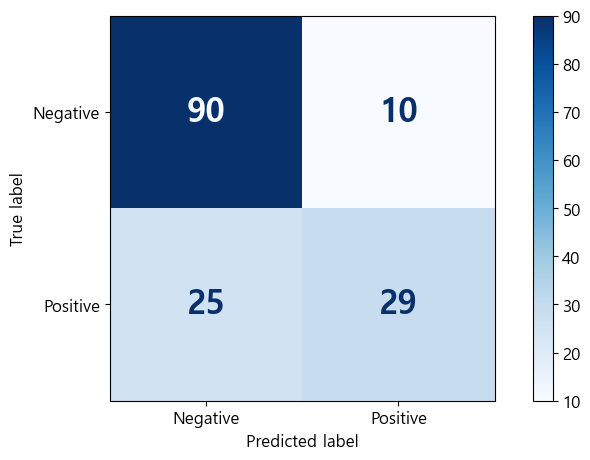


[ROC/PR Curve]


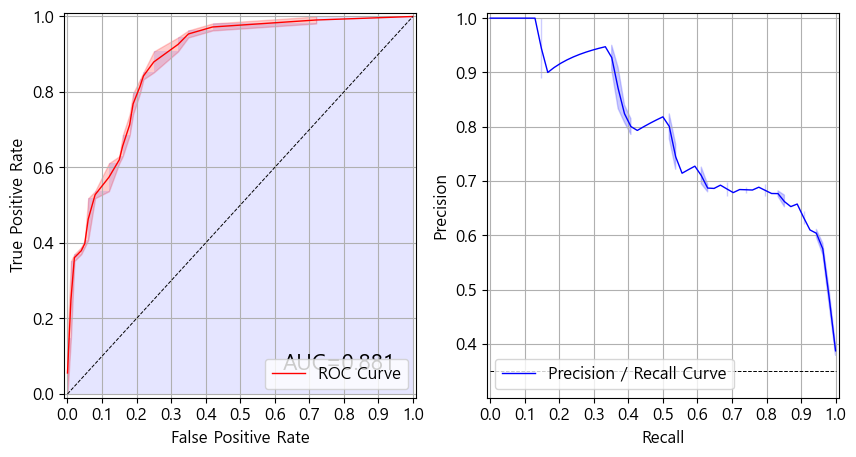


[학습곡선]


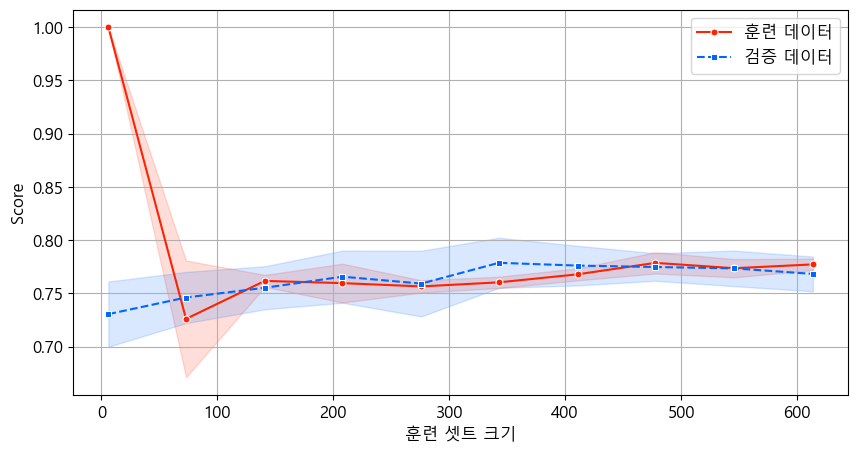

+----+------------+--------------------------+--------------------+------------+---------+------------+
|    | 종속변수   | 독립변수                 |   B(비표준화 계수) |   표준오차 |       t |   유의확률 |
|----+------------+--------------------------+--------------------+------------+---------+------------|
|  0 | Outcome    | Pregnancies              |             0.3443 |       0.27 |  1.2746 |      0.202 |
|  1 | Outcome    | Glucose                  |             0.8728 |      0.234 |  3.7254 |          0 |
|  2 | Outcome    | BloodPressure            |            -0.1806 |      0.219 | -0.8231 |       0.41 |
|  3 | Outcome    | SkinThickness            |            -0.0265 |      0.274 | -0.0968 |      0.923 |
|  4 | Outcome    | Insulin                  |            -0.0128 |       0.23 | -0.0554 |      0.956 |
|  5 | Outcome    | BMI                      |             0.5539 |      0.225 |  2.4635 |      0.014 |
|  6 | Outcome    | DiabetesPedigreeFunction |              0.267 |      0.228 |  1.17

LogisticRegression(C=0.1, max_iter=500, n_jobs=-1)

In [8]:
model = my_logistic_classification(x_train, y_train, x_test, y_test)
model

In [9]:
y_pred = model.predict(x_test)
y_pred_proba_1 = model.predict_proba(x_test)[:, 1]

- 정밀도-재현율 곡선
    - 정밀도와 재현율이 높을수록 좋음
    - 그래프가 우측상단에 붙을수록 성능이 좋은 모델

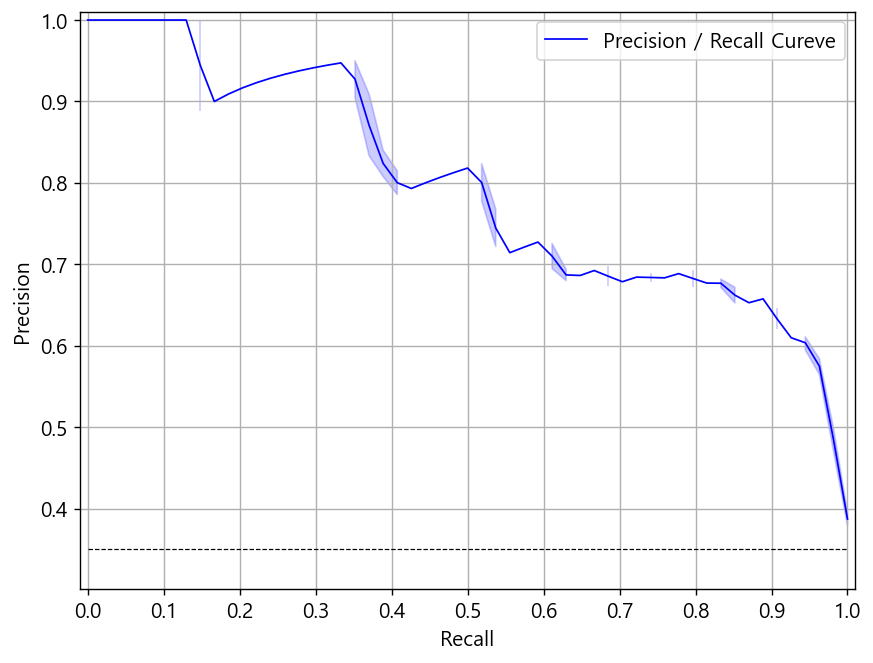

In [10]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_1)
y_test_mean = y_test.mean()

plt.figure(figsize=(8, 6), dpi=125)
sb.lineplot(x=recall, y=precision, label='Precision / Recall Cureve', color='blue', linewidth=1)
sb.lineplot(x=[0,1], y=[y_test_mean,y_test_mean], color='black', linewidth=0.7, linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xticks(np.round(np.arange(0, 1.1, 0.1),2))
plt.xlim(-0.01,1.01)
plt.ylim(y_test_mean-0.05,1.01)
plt.grid()
plt.show()
plt.close()

- ROC-AUC 등 상당수의 평가지표는 다중분류에서는 사용불가

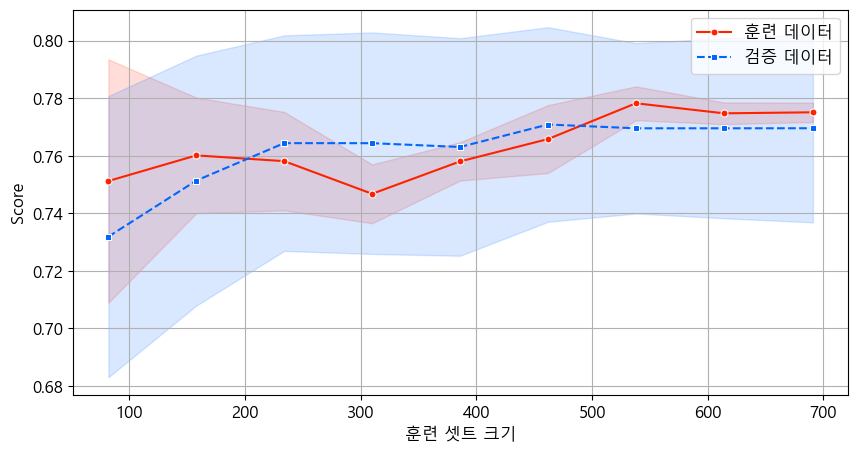

In [11]:
my_learing_curve(model, df, 'Outcome', figsize=(10, 5), dpi=100)

In [12]:
confusion_matrix(y_test, model.predict(x_test))

array([[90, 10],
       [25, 29]], dtype=int64)

In [13]:
precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(x_test)[:, 1], drop_intermediate = True)

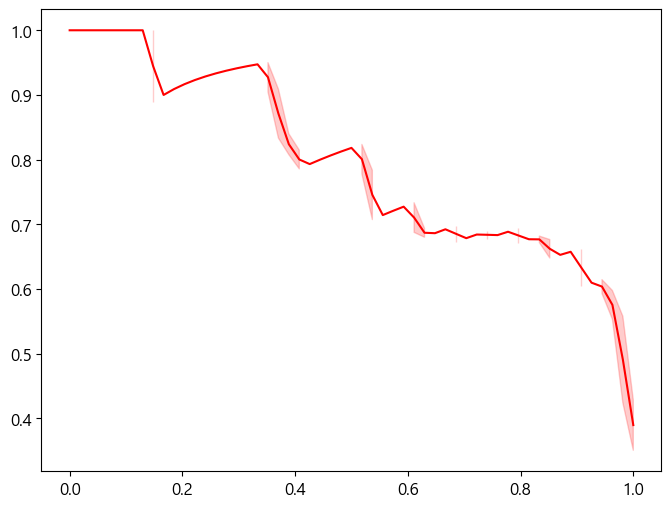

In [14]:
plt.figure()
sb.lineplot(x = recall, y = precision, color = 'red')
plt.show()

In [15]:
df2 = sb.load_dataset('titanic')

In [16]:
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [17]:
df2.drop(['deck', 'alive'], axis = 1, inplace = True)

In [18]:
pp = YjkPreprocessor()
pp.set_strategy(outline = None, null = 'median', encoder = 'ord')

아래와 같이 처리합니다.
+-------------+---------------+
| 범주        | 처리방법      |
|-------------+---------------|
| 이상치 처리 | 처리하지 않음 |
| 결측치 처리 | 중앙값 대체   |
| 스케일러    | 표준화        |
| 인코딩      | 오디널인코딩  |
+-------------+---------------+


In [19]:
df2_p = pp.fit_transform(df2, yname = 'survived')

데이터프레임 크기 : (891, 13)

[열별 결측치 개수]
+-------------+-------------+
| 열명        |   결측치 수 |
|-------------+-------------|
| age         |         177 |
| embarked    |           2 |
| embark_town |           2 |
+-------------+-------------+

연속형 데이터 컬럼 : ['pclass', 'age', 'sibsp', 'parch', 'fare'], 총 5개
명목형 데이터 컬럼 : ['sex', 'embarked', 'class', 'who', 'embark_town'], 총 5개
기타 데이터 컬럼 : ['adult_male', 'alone'], 총 2개
종속변수 컬럼명 : survived


In [20]:
x_train, x_test, y_train, y_test = my_train_test_split(data = df2_p, yname = 'survived', test_size = 0.2, random_state = 0)

In [21]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [22]:
from statsmodels.api import Logit, add_constant # <- 상수항을 직접 추가해야 하지만 코드는 편함
from statsmodels.formula.api import logit # <- 코드가 R 스타일로 불편하지만 상수항은 자동으로 추가됨

In [23]:
pp2 = YjkPreprocessor()
pp2.set_strategy(outline = None, null = 'median', encoder = 'o', scaler = 'r')

아래와 같이 처리합니다.
+-------------+-----------------+
| 범주        | 처리방법        |
|-------------+-----------------|
| 이상치 처리 | 처리하지 않음   |
| 결측치 처리 | 중앙값 대체     |
| 스케일러    | Robust 스케일러 |
| 인코딩      | 원핫인코딩      |
+-------------+-----------------+


In [24]:
df2_p2 = pp2.fit_transform(df2, yname = 'survived')

데이터프레임 크기 : (891, 13)

[열별 결측치 개수]
+-------------+-------------+
| 열명        |   결측치 수 |
|-------------+-------------|
| age         |         177 |
| embarked    |           2 |
| embark_town |           2 |
+-------------+-------------+

연속형 데이터 컬럼 : ['pclass', 'age', 'sibsp', 'parch', 'fare'], 총 5개
명목형 데이터 컬럼 : ['sex', 'embarked', 'class', 'who', 'embark_town'], 총 5개
기타 데이터 컬럼 : ['adult_male', 'alone'], 총 2개
종속변수 컬럼명 : survived


In [25]:
for i in df2_p2.select_dtypes('bool').columns:
    df2_p2[i] = df2_p2[i].astype('int')

In [26]:
X = df2_p2.drop('survived', axis = 1)
Y = df2_p2['survived']

In [27]:
X

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,...,class_Second,class_Third,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,adult_male,alone
0,0.0,-0.461538,1.0,0.0,-0.312011,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0
1,-2.0,0.769231,1.0,0.0,2.461242,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0
2,0.0,-0.153846,0.0,0.0,-0.282777,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1
3,-2.0,0.538462,1.0,0.0,1.673732,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
4,0.0,0.538462,0.0,0.0,-0.277363,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-1.0,-0.076923,0.0,0.0,-0.062981,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1
887,-2.0,-0.692308,0.0,0.0,0.673281,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1
888,0.0,0.000000,1.0,2.0,0.389604,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
889,-2.0,-0.153846,0.0,0.0,0.673281,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1


In [28]:
model_sm = Logit(Y, add_constant(X))
model_sm.fit().summary()

Optimization terminated successfully.
         Current function value: 0.416346
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      878
Method:                           MLE   Df Model:                           12
Date:                Mon, 04 Mar 2024   Pseudo R-squ.:                  0.3748
Time:                        16:03:39   Log-Likelihood:                -370.96
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.244e-87
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.3467        nan        nan        nan         nan         nan
pclass                     -0.7834   1.72e+07  -4.56e-08      1.000   -3.36e+07    3.36e+07
age                        -0.2590      0.123     -2.104      0.035      -0.500      -0.018
sibsp                      -0.6359      0.149     -4.258      0.000      -0.929      -0.343
parch                      -0.3785      0.145     -2.608      0.009      -0.663      -0.094
fare                        0.0615      0.058      1.052      0.293      -0.053       0.176
sex_female                  0.1803   1.43e+07   1.26e-08      1.000    -2.8e+07     2.8e+07
sex_male                    0.1665        nan        nan        nan         nan         nan
embarked_C                  0.1902        nan        nan        nan         nan         nan
embarked_Q                  0.1438   3.29e+08   4.37e-10      1.000   -6.46e+08    6.46e+08
embarked_S                  0.0127   6.36e+06      2e-09      1.000   -1.25e+07    1.25e+07
class_First                 0.3140        nan        nan        nan         nan         nan
class_Second                0.1554        nan        nan        nan         nan         nan
class_Third                -0.1226        nan        nan        nan         nan         nan
who_child                   0.7128        nan        nan        nan         nan         nan
who_man                    -1.1426   1.19e+07  -9.64e-08      1.000   -2.32e+07    2.32e+07
who_woman                   0.7765        nan        nan        nan         nan         nan
embark_town_Cherbourg       0.1902        nan        nan        nan         nan         nan
embark_town_Queenstown      0.1438    3.2e+08   4.49e-10      1.000   -6.27e+08    6.27e+08
embark_town_Southampton     0.0127        nan        nan        nan         nan         nan
adult_male                 -1.1426        nan        nan        nan         nan         nan
alone                      -0.6150      0.293     -2.102      0.036      -1.189      -0.041
===========================================================================================
"""

In [29]:
df3 = pd.read_excel("./data/citrus.xlsx")

In [30]:
df3.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [31]:
pp3 = YjkPreprocessor()
pp3.set_strategy(outline = None, null = 'median')

아래와 같이 처리합니다.
+-------------+---------------+
| 범주        | 처리방법      |
|-------------+---------------|
| 이상치 처리 | 처리하지 않음 |
| 결측치 처리 | 중앙값 대체   |
| 스케일러    | 표준화        |
| 인코딩      | 원핫인코딩    |
+-------------+---------------+


In [32]:
df3_p = pp3.fit_transform(df3, yname = 'name')

데이터프레임 크기 : (10000, 6)
데이터프레임에 결측치는 없습니다.
연속형 데이터 컬럼 : ['diameter', 'weight', 'red', 'green', 'blue'], 총 5개
종속변수 컬럼명 : name


In [37]:
le = LabelEncoder()
df3_p['name'] = le.fit_transform(df3_p['name'])

In [38]:
x_train, x_test, y_train, y_test = my_train_test_split(data = df3_p, yname = 'name', test_size = 0.2, random_state = 0)

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
| 16 |   100 | l2        |             0.961 |
| 13 |    10 | l2        |          0.954375 |
| 10 |     1 | l2        |          0.938125 |
|  7 |   0.1 | l2        |          0.929625 |
|  4 |  0.01 | l2        |          0.929375 |
|  1 | 0.001 | l2        |          0.928875 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.833349 |     0.821616 | 로지스틱회귀의 성능 측정 지표로, 1에 가까울수록 좋은 모델 |
| 정확도(Accuracy)        |     0.961875 |       0.9605 | 예측 결과(TN,FP,TP,TN)가 실제 결과

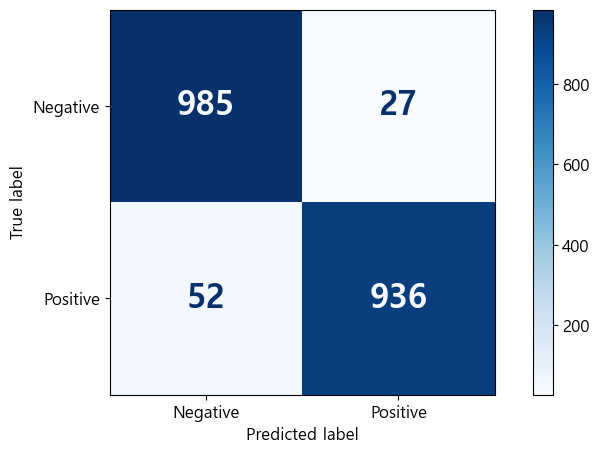


[ROC/PR Curve]


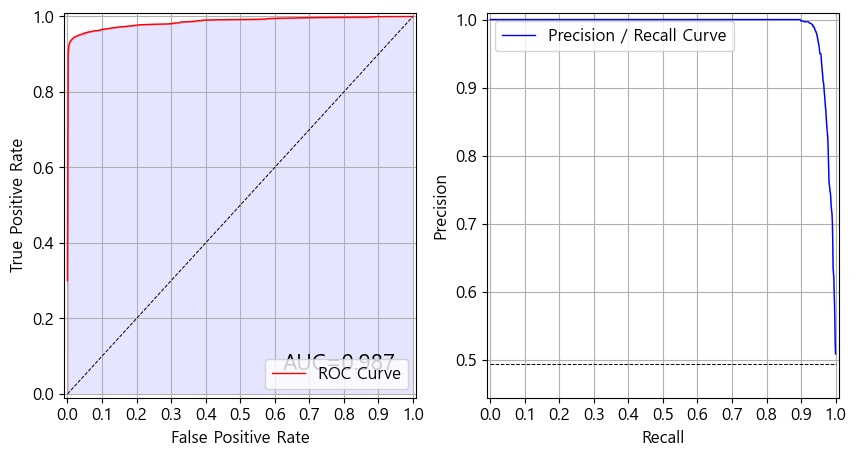


[학습곡선]


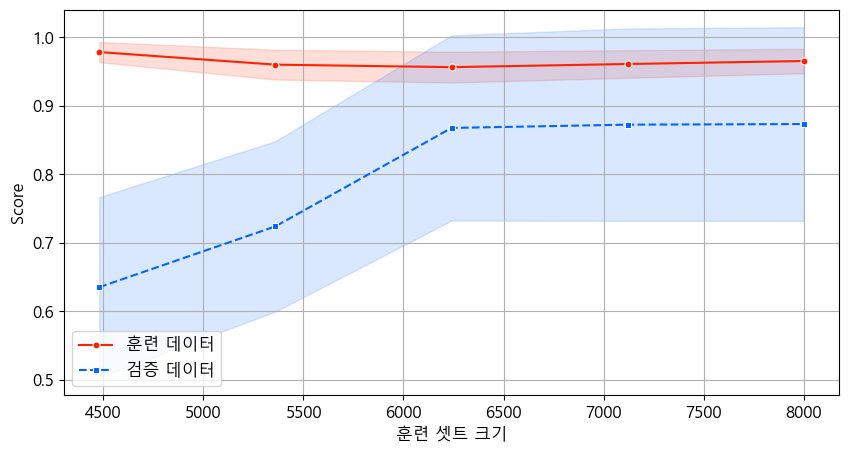

+----+------------+------------+--------------------+------------+----------+------------+
|    | 종속변수   | 독립변수   |   B(비표준화 계수) |   표준오차 |        t |   유의확률 |
|----+------------+------------+--------------------+------------+----------+------------|
|  0 | name       | diameter   |           -48.1729 |       4.47 | -10.7763 |          0 |
|  1 | name       | weight     |            43.4891 |      4.363 |   9.9677 |          0 |
|  2 | name       | red        |              0.586 |      0.124 |    4.739 |          0 |
|  3 | name       | green      |             1.2784 |      0.151 |    8.486 |          0 |
|  4 | name       | blue       |            -1.1098 |      0.147 |   -7.527 |          0 |
+----+------------+------------+--------------------+------------+----------+------------+


In [39]:
model3 = my_logistic_classification(x_train, y_train, x_test, y_test)

In [41]:
df4 = sb.load_dataset('iris')

In [42]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


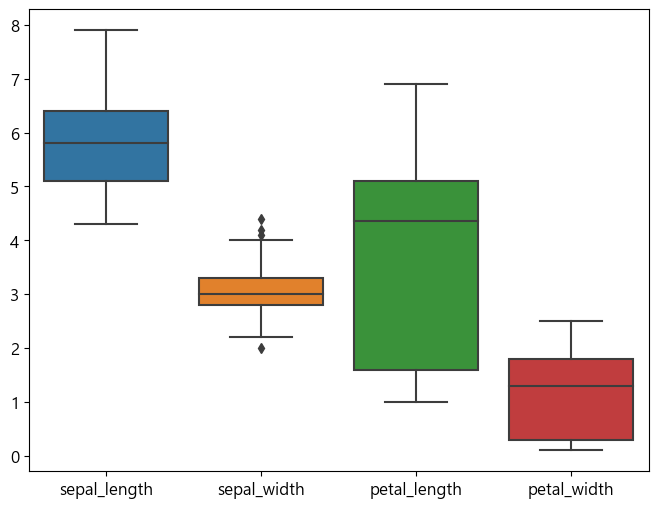

In [43]:
plt.figure()
sb.boxplot(data = df4)
plt.show()

In [44]:
pp4 = YjkPreprocessor()
pp4.set_strategy(outline = None)

아래와 같이 처리합니다.
+-------------+---------------+
| 범주        | 처리방법      |
|-------------+---------------|
| 이상치 처리 | 처리하지 않음 |
| 결측치 처리 | 중앙값 대체   |
| 스케일러    | 표준화        |
| 인코딩      | 원핫인코딩    |
+-------------+---------------+


In [49]:
df4_p = pp4.fit_transform(df4, yname = 'species')

데이터프레임 크기 : (150, 5)
데이터프레임에 결측치는 없습니다.
연속형 데이터 컬럼 : ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 총 4개
종속변수 컬럼명 : species


In [59]:
le = LabelEncoder()
df4_p['species'] = le.fit_transform(df4_p['species'])

In [60]:
x_train, x_test, y_train, y_test = my_train_test_split(df4_p, yname = 'species', test_size = 0.2, random_state = 0)

In [61]:
model4 = LogisticRegression()
model4.fit(x_train, y_train)

LogisticRegression()

In [62]:
model4.score(x_test, y_test)

1.0

In [63]:
model4.score(x_train, y_train)

0.9583333333333334

In [64]:
model4.classes_

array([0, 1, 2])